# Prediksi Umur Abalone Berdasarkan Karakteristik Fisik

## Pendahuluan

Abalone adalah sejenis moluska laut yang bernilai tinggi dalam industri makanan laut. Umur abalone merupakan parameter penting dalam studi biologi kelautan dan juga untuk kepentingan komersial. Namun, mengukur umur abalone secara langsung membutuhkan proses yang rumit dan destruktif, yaitu dengan menghitung cincin pertumbuhan pada cangkangnya menggunakan mikroskop. Oleh karena itu, pendekatan prediktif menggunakan pembelajaran mesin menjadi solusi yang efisien untuk memperkirakan umur abalone berdasarkan karakteristik fisiknya.

Dataset Abalone menyediakan data dari berbagai fitur fisik seperti panjang, diameter, tinggi, dan berat dari berbagai bagian tubuh abalone. Fitur-fitur ini dapat digunakan untuk mengembangkan model prediksi umur abalone secara otomatis dan non-destruktif.

## Data Understanding

### Sumber Dataset

Dataset diambil dari tautan berikut:

https://archive.ics.uci.edu/dataset/1/abalone

Dataset Abalone yang tersedia di UCI Machine Learning Repository dikumpulkan oleh Marine Resources Division, Department of Primary Industry and Fisheries, Tasmania. Dataset ini berisi data pengukuran fisik abalone dan jumlah cincin yang digunakan untuk memperkirakan umur.

### Tujuan

Dataset ini digunakan untuk mengembangkan model prediktif guna memperkirakan umur abalone berdasarkan parameter fisik yang diukur, yang akan sangat membantu dalam studi populasi, penelitian biologi, dan pengelolaan sumber daya laut.

### Penjelsan Fitur dan Variabel

Dataset ini digunakan untuk memperkirakan usia abalone berdasarkan berbagai pengukuran fisik yang lebih mudah dilakukan daripada metode tradisional. Secara konvensional, umur abalone ditentukan dengan memotong cangkangnya, mewarnai bagian tertentu, lalu menghitung jumlah cincin pertumbuhan di bawah mikroskop. Metode tersebut cukup rumit dan membutuhkan ketelitian tinggi.

Sebagai alternatif, dataset ini menyediakan sejumlah fitur numerik yang dapat dimanfaatkan untuk membuat model prediksi usia tanpa harus merusak abalone. Dataset telah melalui proses pembersihan, termasuk penghapusan data yang memiliki nilai hilang, serta normalisasi skala pada fitur numerik (dengan pembagian nilai terhadap 200) untuk mempermudah proses pelatihan model, seperti jaringan saraf tiruan (JST).

Dan untuk fitur-fitur yang digunakan diantaranya:

* Sex = (Jenis kelamin) Jenis kelamin abalone (M, F, atau I)
* Length = (Panjang) Panjang tubuh abalone (tidak termasuk cangkang)
* Diameter = (Diameter) Diameter tubuh abalone dalam cm
* Height = (Tinggi) Tinggi abalone dengan cangkang
* Whole_weight = (Berat_utuh) Berat total abalone
* Shucked_weight = (Berat_buah) Berat daging abalone setelah dipisahkan
* Viscera_weight = (Berat Viscera) Berat organ dalam (seperti hati)
* Shell_weight = (Berat cangkang) Berat cangkang setelah dikeringkan
* Rings = (Cincin) 	Jumlah cincin pertumbuhan yang digunakan sebagai indikator usia biologis. Umur abalone dapat dihitung dengan rumus: Rings + 1.5 tahun.


### Ekplorasi Data

Dataset yang saya gunakan ini tidak memiliki outlier dan tidak memiliki missing value

### Visualisasi Data

In [2]:
%pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [4]:
import pandas as pd

# Gabungkan fitur dan target
df_abalone = pd.concat([X, y], axis=1)

# Tampilkan seluruh baris (jika datasetnya kecil)
# Jika besar, batasi baris atau ubah opsi tampilan
print("Total baris dataset ini adalah =",len(df_abalone))
print("Visualisasi dataset abalone")
print(df_abalone.to_string(index=False))

Total baris dataset ini adalah = 4177
Visualisasi dataset abalone
Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  Shell_weight  Rings
  M   0.455     0.365   0.095        0.5140          0.2245          0.1010        0.1500     15
  M   0.350     0.265   0.090        0.2255          0.0995          0.0485        0.0700      7
  F   0.530     0.420   0.135        0.6770          0.2565          0.1415        0.2100      9
  M   0.440     0.365   0.125        0.5160          0.2155          0.1140        0.1550     10
  I   0.330     0.255   0.080        0.2050          0.0895          0.0395        0.0550      7
  I   0.425     0.300   0.095        0.3515          0.1410          0.0775        0.1200      8
  F   0.530     0.415   0.150        0.7775          0.2370          0.1415        0.3300     20
  F   0.545     0.425   0.125        0.7680          0.2940          0.1495        0.2600     16
  M   0.475     0.370   0.125        0.5095          0.2165  

In [5]:
# Simpan ke file CSV
df_abalone.to_csv('datasetabalone.csv', index=False)

## Preprocessing Data

### Transformasi data

Kolom target (Rings) yang sebelumnta itu numerik dikonversi menjadi kategori usia: Muda, Dewasa, dan Tua berdasarkan jumlah cincin.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1. Load Dataset
df = pd.read_csv('/content/datasetabalone.csv')

# 2. Ubah Target jadi Kategori Usia
def label_usia(rings):
    if rings <= 8:
        return 'Muda'
    elif rings <= 11:
        return 'Dewasa'
    else:
        return 'Tua'

df['UsiaKategori'] = df['Rings'].apply(label_usia)

### Normalisasi Data

Fitur numerik dinormalisasi menggunakan StandardScaler dari library sklearn untuk menyamakan skala antar variabel dan meningkatkan performa model.

In [7]:
# 3. Encode Fitur Kategori "Sex"
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # M=1, F=0, I=2 (urutan bisa berbeda tergantung dataset)

# 4. Pisahkan Fitur dan Label
X = df.drop(columns=['Rings', 'UsiaKategori'])  # fitur
y = df['UsiaKategori']                          # label klasifikasi

# 5. Scaling (Opsional tapi disarankan)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split Data

Datas dibagi menjadi 2 yaitu:
* data traning 80%
* data testing 20%

In [8]:
# 6. Split Data Training & Testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Visualisasi data setelah prepocessing

In [9]:
import pandas as pd

# Gabungkan fitur dan target
df_abalonecategorical = pd.concat([X, y], axis=1)

# Tampilkan seluruh baris (jika datasetnya kecil)
# Jika besar, batasi baris atau ubah opsi tampilan
print("Total baris dataset ini adalah =",len(df_abalone))
print("Visualisasi dataset abalone setelah target diubah menjadi kategorikal")
print(df_abalonecategorical.to_string(index=False))

Total baris dataset ini adalah = 4177
Visualisasi dataset abalone setelah target diubah menjadi kategorikal
 Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  Shell_weight UsiaKategori
   2   0.455     0.365   0.095        0.5140          0.2245          0.1010        0.1500          Tua
   2   0.350     0.265   0.090        0.2255          0.0995          0.0485        0.0700         Muda
   0   0.530     0.420   0.135        0.6770          0.2565          0.1415        0.2100       Dewasa
   2   0.440     0.365   0.125        0.5160          0.2155          0.1140        0.1550       Dewasa
   1   0.330     0.255   0.080        0.2050          0.0895          0.0395        0.0550         Muda
   1   0.425     0.300   0.095        0.3515          0.1410          0.0775        0.1200         Muda
   0   0.530     0.415   0.150        0.7775          0.2370          0.1415        0.3300          Tua
   0   0.545     0.425   0.125        0.7680          0.2940

In [10]:
# Simpan ke file CSV
df_abalonecategorical.to_csv('datasetabalonecategorical.csv', index=False)

## Modelling

Modelling adalah tahap membangun dan menguji model matematis atau statistik untuk mengenali pola atau hubungan dalam data.

Tujuannya adalah menghasilkan prediksi yang akurat dan menemukan pola yang bermanfaat dari data yang telah disiapkan.

### Modelling Klasifikasi Dataset Abalone Menggunakan Decision Tree

Pemodelan ini bertujuan untuk mengelompokkan usia abalone ke dalam tiga kategori berdasarkan ciri-ciri fisik seperti panjang, berat, dan diameter tubuh. Kategori usia yang digunakan adalah Muda, Dewasa, dan Tua.

Algoritma yang diterapkan adalah Decision Tree Classifier, yaitu metode pembelajaran terawasi (supervised learning) yang membuat keputusan berdasarkan serangkaian percabangan logis dari fitur-fitur data. Setiap percabangan merepresentasikan aturan pengambilan keputusan, sedangkan ujungnya (daun) menunjukkan hasil klasifikasinya.


#### 1. Pembagian Data (Data Latih dan Data Uji)

Langkah awal adalah membagi data menjadi dua bagian:

* Data Latih (Training): digunakan untuk melatih model.
* Data Uji (Testing): digunakan untuk menguji akurasi model terhadap data baru.

Dua rasio umum yang sering digunakan:

* 80% data latih dan 20% data uji
* 70% data latih dan 30% data uji

Untuk eksperimen ini, digunakan rasio 80:20, namun pemilihan rasio dapat disesuaikan berdasarkan kebutuhan dan kondisi data.


#### 2. Tahap Pra-Pemrosesan Data

Sebelum dilakukan pelatihan, beberapa penyesuaian data dilakukan:

* Kolom `Rings` (jumlah cincin) dikonversi menjadi kelas usia menggunakan aturan:

  * `Rings ≤ 8` → Muda
  * `9 ≤ Rings ≤ 11` → Dewasa
  * `Rings ≥ 12` → Tua

* Fitur `Sex` dikodekan menggunakan Label Encoding untuk mengubah kategori `['M', 'F', 'I']` menjadi nilai numerik `[0, 1, 2]`.

* Fitur-fitur lain seperti panjang dan berat tubuh tidak perlu diskritisasi karena Decision Tree mampu menangani data numerik secara langsung.



#### 3. Pelatihan Model (Decision Tree)

Model dilatih dengan menggunakan algoritma Decision Tree, di mana:

* Setiap node pohon akan memecah data berdasarkan fitur yang paling mengurangi impurity (biasanya diukur dengan Gini Index atau Entropy).
* Pemisahan dilakukan secara rekursif hingga mencapai kedalaman tertentu (`max_depth`) atau data tidak dapat dipisah lebih lanjut.

Misalnya, pada model ini digunakan:

* Kriteria: `gini` (untuk mengukur kualitas split)
* Kedalaman maksimum: `5` (agar pohon tidak overfitting)


#### 4. Evaluasi Performa

Setelah pelatihan, performa model diuji menggunakan:

* Akurasi: persentase prediksi yang benar terhadap total data uji.
* Classification Report: metrik evaluasi lainnya seperti precision, recall, dan F1-score untuk masing-masing kelas usia.
* Confusion Matrix: untuk melihat distribusi prediksi model terhadap kelas aktual.

Visualisasi pohon keputusan juga dapat ditampilkan untuk memahami struktur pengambilan keputusan oleh model — fitur mana yang paling penting, urutan pengujian fitur, dan bagaimana data diklasifikasikan di tiap cabang.


#### 5. Prediksi dan Interpretasi

Model yang sudah dilatih dapat digunakan untuk:

* Memprediksi usia abalone baru dari input fitur-fitur fisiknya.
* Mengetahui fitur apa yang paling mempengaruhi prediksi usia, seperti `ShellWeight` atau `Length`.


#### Kesimpulan

Decision Tree merupakan pilihan yang baik untuk klasifikasi pada dataset abalone karena:

* Mampu menangani data numerik tanpa perlakuan khusus.
* Hasilnya mudah dipahami karena berbentuk pohon keputusan.
* Efisien digunakan untuk dataset skala kecil hingga menengah.

Model ini menawarkan pendekatan cepat dan praktis untuk memperkirakan usia abalone tanpa harus menghitung cincin secara manual.


Akurasi: 0.6674641148325359

=== Classification Report ===
              precision    recall  f1-score   support

      Dewasa       0.62      0.75      0.68       374
        Muda       0.77      0.73      0.75       279
         Tua       0.63      0.40      0.49       183

    accuracy                           0.67       836
   macro avg       0.67      0.63      0.64       836
weighted avg       0.67      0.67      0.66       836



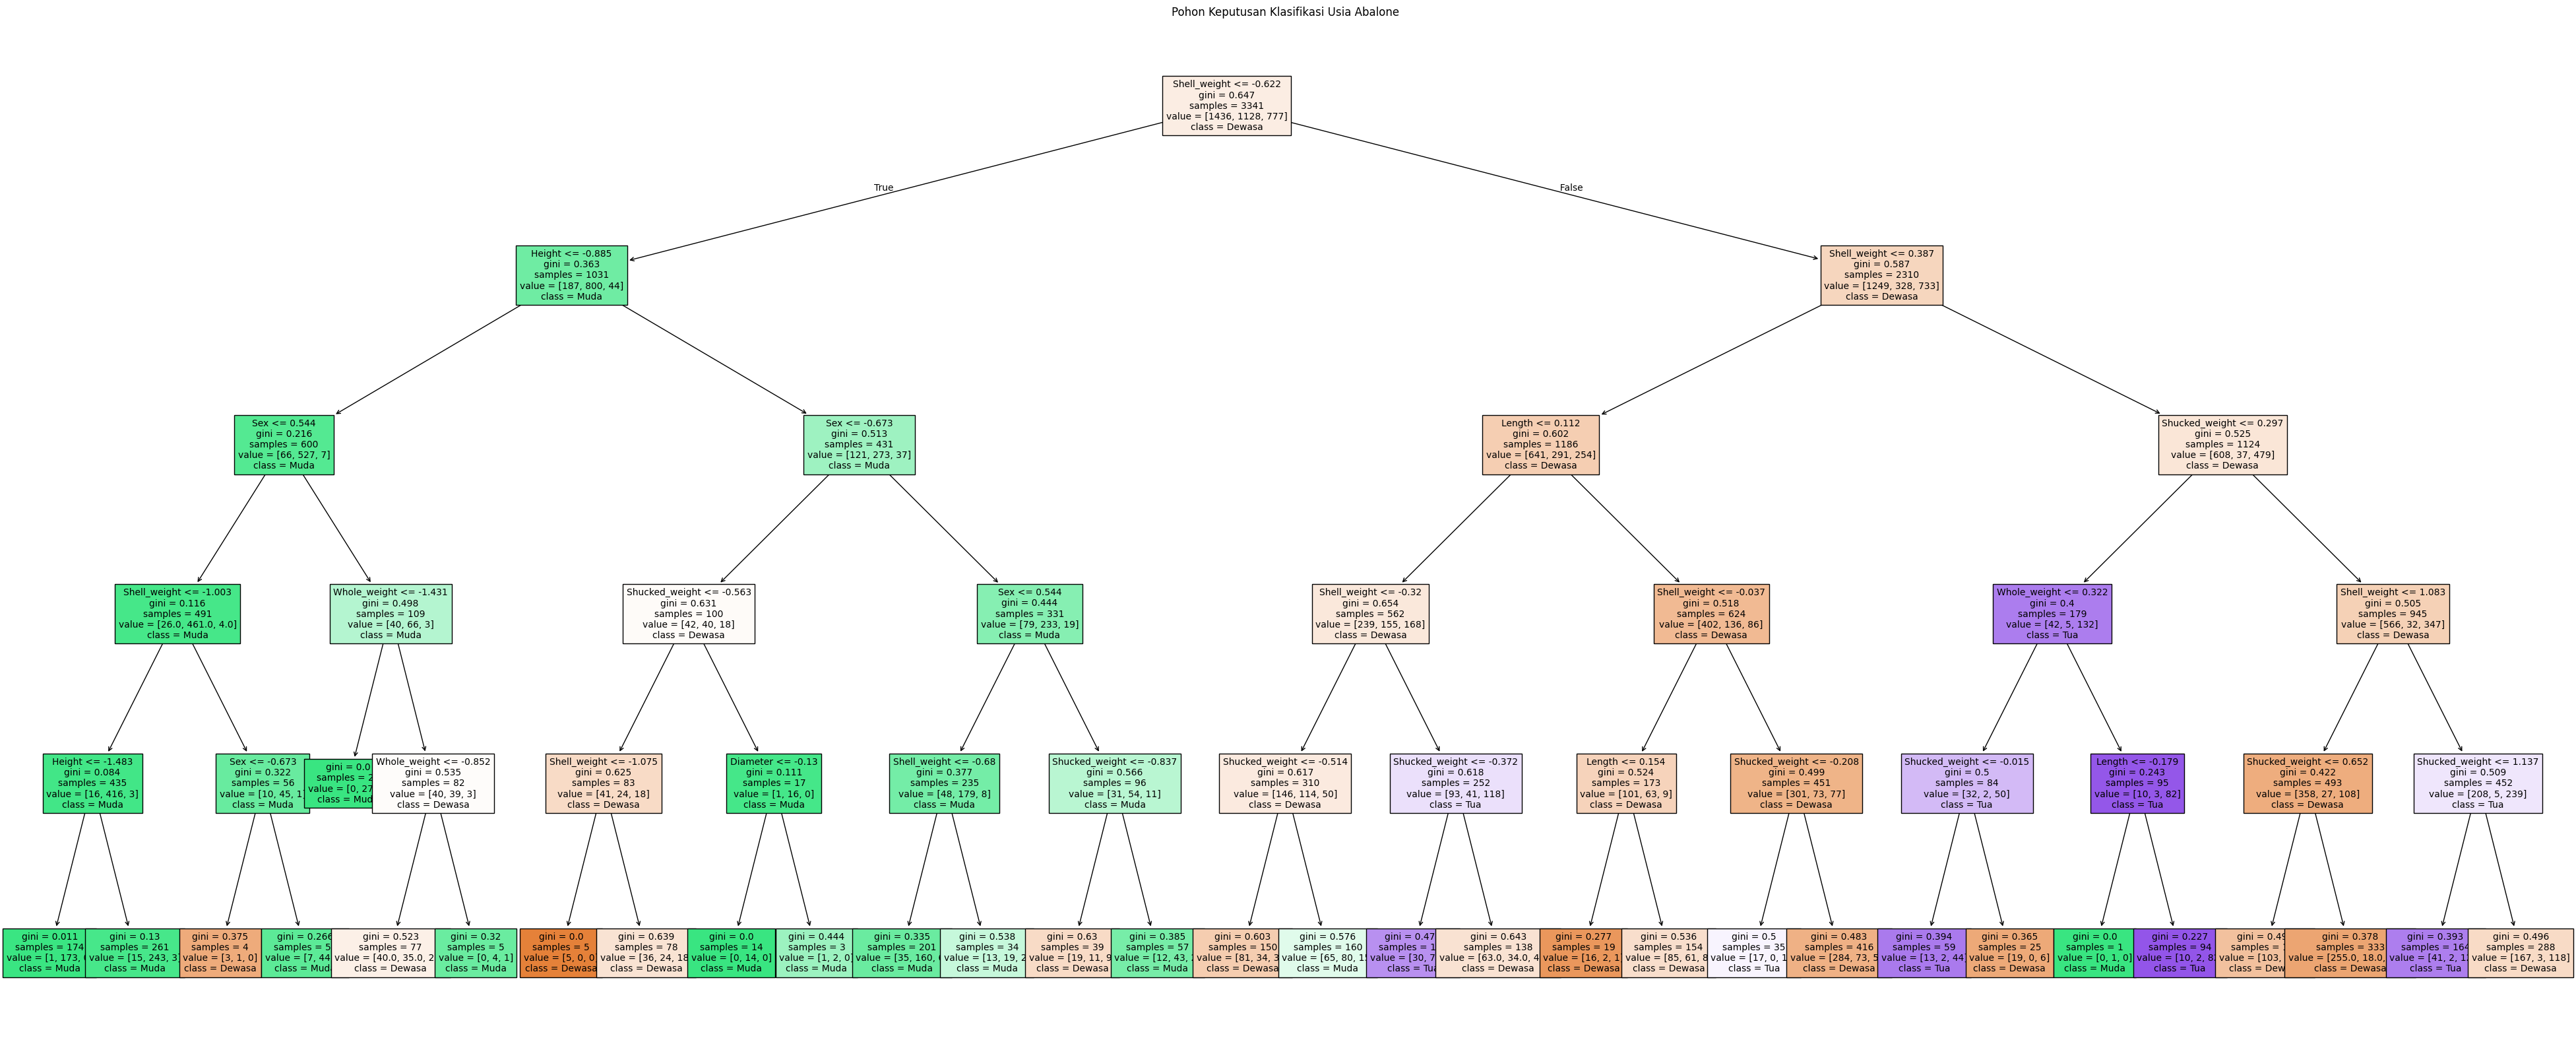

In [11]:
# 7. Training Decision Tree
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# 8. Evaluasi Model
y_pred = clf.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# 9. Visualisasi Struktur Pohon
plt.figure(figsize=(50, 20))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, fontsize=10)
plt.title("Pohon Keputusan Klasifikasi Usia Abalone")
plt.show()

### Modelling Klasifikasi Dataset Abalone menggunakan Gaussian Naive Bayes

Pemodelan kali ini bertujuan untuk mengelompokkan usia abalone berdasarkan ciri-ciri fisiknya, seperti panjang tubuh, berat, dan ukuran lainnya. Kategori usia dibagi menjadi tiga: Muda, Dewasa, dan Tua.

Untuk metode klasifikasi, digunakan algoritma Gaussian Naive Bayes, yang bekerja berdasarkan prinsip probabilitas dan distribusi normal untuk fitur-fitur numerik.

#### 1. Pembagian Dataset menjadi Data Latih dan Data Uji

Langkah awal dalam proses modelling adalah membagi data menjadi dua bagian:

* Data Latih (Train set) untuk membangun model.
* Data Uji (Test set) untuk mengukur performa model pada data yang belum pernah dilihat sebelumnya.

Umumnya, terdapat dua jenis pembagian rasio yang sering digunakan, yaitu:

* 80% data latih dan 20% data uji.
* 70% data latih dan 30% data uji.

Dalam modeling ini, kita memilih rasio 80:20, namun rasio ini dapat disesuaikan tergantung kondisi dan kebutuhan di lapangan.

#### 2. Menghitung Probabilitas Awal (Prior Probability)

Setelah data terbagi, kita hitung probabilitas awal (prior) untuk masing-masing kelas usia. Caranya adalah:

* Hitung jumlah data latih untuk setiap kelas (`Muda`, `Dewasa`, `Tua`).
* Bagi dengan total jumlah data latih.

Nilai ini menunjukkan seberapa besar kemungkinan suatu abalone termasuk ke dalam kelas tersebut tanpa melihat fitur apapun.

#### 3. Menghitung Rata-rata dan Standar Deviasi Tiap Fitur

Untuk setiap kelas usia, kita hitung:

* Rata-rata (mean) setiap fitur numerik seperti `Length`, `Diameter`, `Weight`, dll.
* Standar deviasi (standard deviation) untuk fitur-fitur tersebut.

Langkah ini penting karena GaussianNB mengasumsikan bahwa data dalam setiap fitur mengikuti distribusi normal (Gaussian).



#### 4. Menghitung Distribusi Gaussian

Menggunakan rumus distribusi Gaussian, kita menghitung probabilitas kemunculan nilai fitur tertentu untuk setiap kelas usia.
Rumus distribusi Gaussian:

$$
P(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$

dimana:

* $x$: nilai fitur input
* $\mu$: rata-rata fitur pada kelas tertentu
* $\sigma$: standar deviasi fitur pada kelas tertentu

#### 5. Menghitung Posterior Probability

Setelah kita memperoleh probabilitas Gaussian dari masing-masing fitur, langkah selanjutnya adalah menghitung posterior dengan rumus:

$$
\text{Posterior} = P(x_1|C_i) \cdot P(x_2|C_i) \cdot \ldots \cdot P(x_n|C_i) \cdot P(C_i)
$$

dimana:

* $P(x_k|C_i)$: hasil distribusi Gaussian dari fitur ke-k pada kelas $C_i$
* $P(C_i)$: prior probability dari kelas $C_i$



#### 6. Menentukan Prediksi Kelas

Langkah terakhir adalah membandingkan semua nilai posterior yang telah dihitung dari masing-masing kelas.

* Kelas dengan posterior terbesar adalah prediksi akhir untuk data input tersebut.

Berikut model yang telah dibuat untuk memprediksi usia abalone

Akurasi: 0.5633971291866029

=== Classification Report ===
              precision    recall  f1-score   support

      Dewasa       0.55      0.49      0.52       374
        Muda       0.67      0.80      0.73       279
         Tua       0.37      0.36      0.36       183

    accuracy                           0.56       836
   macro avg       0.53      0.55      0.54       836
weighted avg       0.55      0.56      0.56       836



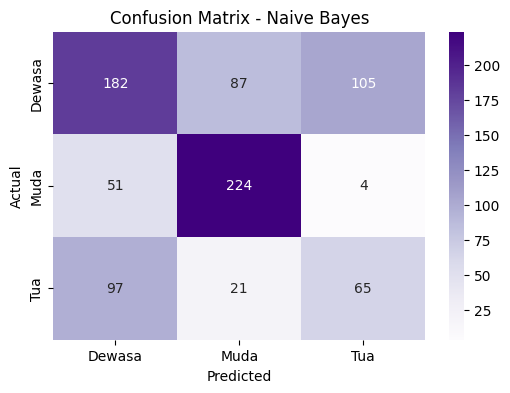

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 7. Latih model Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 8. Evaluasi hasil prediksi
y_pred = gnb.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=gnb.classes_, yticklabels=gnb.classes_, cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

### Modelling Klasifikasi Dataset Abalone menggunakan K-Nearest Neighbor (K-NN)

Dalam pemodelan ini, algoritma K-Nearest Neighbors (KNN) diterapkan untuk mengelompokkan usia abalone menjadi tiga kategori: Muda, Dewasa, dan Tua, berdasarkan fitur-fitur fisik seperti panjang, diameter, berat tubuh, dan lainnya.

KNN bekerja dengan prinsip pencarian tetangga terdekat: data baru akan diklasifikasikan sesuai dengan mayoritas label dari data latih terdekat dalam ruang fitur.

#### 1. Pembagian Dataset: Training dan Testing

Seperti halnya metode supervised learning lainnya, dataset abalone terlebih dahulu dibagi menjadi dua bagian:

* Data Latih (Training Set): digunakan untuk menyimpan data referensi (tetangga).
* Data Uji (Testing Set): digunakan untuk menguji keakuratan model.

Dalam modeling ini, digunakan pembagian 80% data latih dan 20% data uji, yang merupakan praktik umum. Namun, pembagian ini bersifat fleksibel dan dapat disesuaikan tergantung kondisi data di lapangan.

#### 2. Pra-Pemrosesan Data

Agar algoritma KNN bekerja optimal, beberapa tahapan pra-pemrosesan dilakukan:

* Konversi Target: Kolom `Rings` diklasifikasikan menjadi tiga kelas:

  * `Muda`: ≤ 8 cincin
  * `Dewasa`: 9–11 cincin
  * `Tua`: ≥ 12 cincin

* Encoding Fitur Kategorikal: Kolom `Sex` yang berisi nilai non-numerik (`M`, `F`, `I`) dikonversi menjadi numerik menggunakan Label Encoding.

* Scaling / Normalisasi: Fitur-fitur numerik seperti panjang, berat, dan diameter perlu dinormalisasi menggunakan metode seperti StandardScaler. Hal ini penting karena KNN sangat sensitif terhadap skala — fitur dengan nilai besar dapat mendominasi jarak jika tidak distandarkan.

#### 3. Konsep Kerja KNN

Berbeda dengan model-model yang membentuk fungsi atau aturan eksplisit, KNN bekerja dengan menyimpan data latih dan menghitung jarak (biasanya Euclidean) antara data uji dan semua data latih.

Langkah-langkah:

1. Hitung jarak dari data uji ke semua data latih.
2. Ambil k data tetangga terdekat.
3. Lakukan voting — kelas usia yang paling sering muncul di antara tetangga tersebut akan menjadi prediksi akhir.

Misalnya:

* Jika `k = 5`, dan di antara 5 tetangga terdekat terdapat 3 yang berlabel "Dewasa", maka prediksi akhir adalah "Dewasa".

#### 4. Evaluasi Model

Model KNN dievaluasi menggunakan:

* Akurasi: jumlah prediksi benar dibandingkan total data uji.
* Classification Report: mencakup precision, recall, dan F1-score untuk setiap kelas.
* Confusion Matrix: menunjukkan jumlah prediksi benar dan salah untuk masing-masing kelas.

Selain itu, eksperimen dengan nilai k yang berbeda (misalnya 3, 5, 7) juga dapat dilakukan untuk mencari k terbaik yang menghasilkan akurasi tertinggi.

#### Kesimpulan

K-Nearest Neighbor merupakan metode klasifikasi sederhana namun efektif, terutama saat data telah diproses dengan benar. Dengan mengandalkan kemiripan data, model ini dapat membantu memperkirakan usia abalone tanpa perlu menghitung cincin secara manual — proses yang biasanya cukup rumit dan memakan waktu.

Akurasi: 0.6614832535885168

=== Classification Report ===
              precision    recall  f1-score   support

      Dewasa       0.62      0.70      0.66       374
        Muda       0.75      0.75      0.75       279
         Tua       0.60      0.45      0.51       183

    accuracy                           0.66       836
   macro avg       0.66      0.63      0.64       836
weighted avg       0.66      0.66      0.66       836



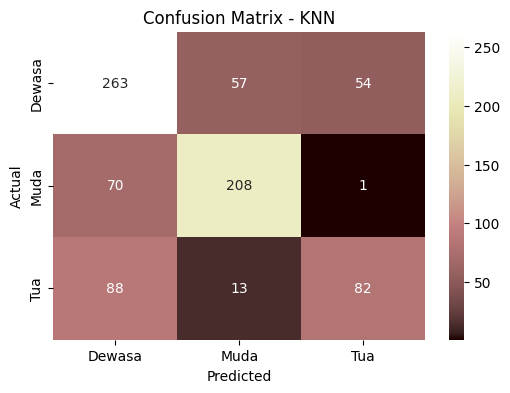

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 7. Latih model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # kamu bisa ubah k sesuai kebutuhan
knn.fit(X_train, y_train)

# 8. Evaluasi
y_pred = knn.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=knn.classes_, yticklabels=knn.classes_, cmap='pink')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

## Evaluasi Data

Berdasarkan hasil klasifikasi pada dataset abalone, diperoleh tingkat akurasi dari ketiga model sebagai berikut:

Decision Tree : 66,75%

Gaussian Naive Bayes : 56,34%

K-Nearest Neighbor : 66,15%

Dari hasil tersebut, dapat diketahui bahwa Decision Tree menunjukkan performa paling tinggi dengan akurasi sebesar 66,75%, sedikit lebih unggul dibandingkan metode lainnya.